In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import figure

rcParams['font.family'] = 'Times New Roman'
rcParams['font.sans-serif'] = ['Times New Roman']


## RQ2 - Figure 5: Best Worst Distribution

In [2]:
values = {
    "Random": {"Best": 4, "Worst": 3},
    "Triphone": {"Best": 5, "Worst": 8},
    "Phoneme": {"Best": 2, "Worst": 9},
    "PEP": {"Best": 5, "Worst": 5},
    "PEP-D": {"Best": 4, "Worst": 7},
    "SEP": {"Best": 6, "Worst": 3},
    "WEP": {"Best": 7, "Worst": 0},
    "WEP-D": {"Best": 4, "Worst": 1},
}

df = pd.DataFrame(values)
df = df.T

df

,Best,Worst
Random,4,3
Triphone,5,8
Phoneme,2,9
PEP,5,5
PEP-D,4,7
SEP,6,3
WEP,7,0
WEP-D,4,1


In [3]:
df_prop = df.T.apply(lambda x: x / x.sum(), axis=0).T
df_prop

,Best,Worst
Random,0.571429,0.428571
Triphone,0.384615,0.615385
Phoneme,0.181818,0.818182
PEP,0.500000,0.500000
PEP-D,0.363636,0.636364
SEP,0.666667,0.333333
WEP,1.000000,0.000000
WEP-D,0.800000,0.200000


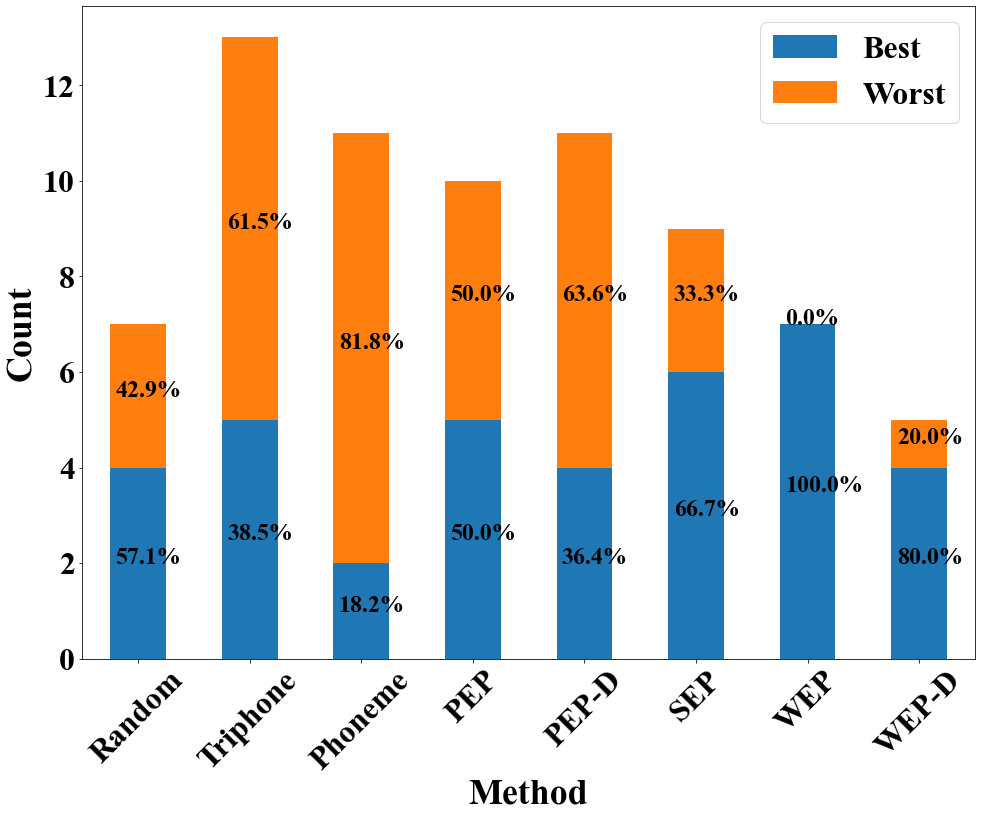

In [4]:
df.plot(
    kind='bar',
    stacked=True,
    colormap=None,
    figsize=(16, 12)
)
plt.xlabel("Method", size=36, fontweight='bold')
plt.ylabel("Count", size=36, fontweight='bold')

plt.xticks(fontsize=32, fontweight='bold', rotation=45)
plt.yticks(fontsize=32, fontweight='bold')

plt.legend(prop={'size': 32,'weight': 'bold'})

for n, x in enumerate([*df.index.values]):
    for proportion, y_loc in zip(df_prop.loc[x], df_prop.loc[x].cumsum()):

        plt.text(x=n-0.2,
                 y=((y_loc - proportion) + (proportion / 2)) * df.loc[x].sum(),
                 s=f'{np.round(proportion * 100, 1)}%',
                 color="black",
                 fontsize=24,
                 fontweight="bold")

# plt.grid(b=True, axis='both', linewidth=0.8)

filename = "result/plot/best_worst_distribution.pdf"
plt.savefig(filename, bbox_inches='tight')
